<a href="https://colab.research.google.com/github/gabrielhidd/fundos-funds/blob/main/Funds_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.0 - Importando Bibliotecas / Importing Libraries

Nessa seção estamos importando as bibliotecas que iremos utilizar. As trabicionais, comummente utilizadas, e as mais incomuns. Destacamos a Yahoo Fiannce, para dados financeiros da bolsa brasileira, e a pandas_datareader, que ajuda na criação de DataFrames de dados da web.
***
In this section we are importing the libraries. The traditional ones, commonly used, and the most unusual. We highlight Yahoo Fiannce, for financial data from the Brazilian stock exchange, and pandas_datareader, which helps in the creation of DataFrames from web data.

##1.1 - Tradicionais / Most Comuns

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
import pandas_datareader.data as web 
#Ajuda a coletar dados da web e criar dataframes
#Helps to collect data from the web and create dataframes

In [79]:
plt.rcParams['figure.figsize'] = (25, 8)

##1.2 - Yahoo Finance

In [80]:
!pip install yfinance --upgrade --no-cache-dir

In [81]:
import yfinance as yf
yf.pdr_override() 

#2.0 - Criando Funções / Creating Fuctions

Foram criadas funções de coleta de dados e ajuste de bases, as duas primeiras coletam dados da CVM. Apesar de serem bem parecidas, a partir de 04/2020 houve uma mudança nas bases da CVM, por isso que as funções foram divididas.
***
Data collection and base adjustment functions were created, the first two collecting CVM data. Despite being very similar, after 04/2020 there was a change in the CVM bases, which is why the functions were divided.

##2.1 - Coletando Dados da CVM / Collecting CVM Data

In [82]:
def cvm_month1(year_month):
  url = 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{}.csv'.format(year_month)
  df_cvm = pd.read_csv(url, sep = ";", encoding = "UTF-8")
  df_cvm.drop(['VL_TOTAL', 'VL_PATRIM_LIQ', 'CAPTC_DIA', 'RESG_DIA', 'NR_COTST'], axis = 1 , inplace = True)
  colunas = {'CNPJ_FUNDO': 'CNPJ', 'DT_COMPTC': 'Dia', 'VL_QUOTA': 'Quota'}
  df_cvm.rename(columns = colunas, inplace = True)
  return df_cvm

In [83]:
def cvm_month2(year_month):
  url = 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{}.csv'.format(year_month)
  df_cvm = pd.read_csv(url, sep = ";", encoding = "UTF-8")
  df_cvm.drop(['TP_FUNDO', 'VL_TOTAL', 'VL_PATRIM_LIQ', 'CAPTC_DIA', 'RESG_DIA', 'NR_COTST'], axis = 1 , inplace = True)
  colunas = {'CNPJ_FUNDO': 'CNPJ', 'DT_COMPTC': 'Dia', 'VL_QUOTA': 'Quota'}
  df_cvm.rename(columns = colunas, inplace = True)
  return df_cvm

A partir da coleta dos dados da CVM, mineramos os dados para ficarem só as columnas que nos servem.
***
From the collection of CVM data, we mined the data so that only the columns that serve us remain.

##2.2 - Minerando Dados da CVM / Mining CVM Data

In [84]:
def fund_cvm(cnpj, fund):
  fundo = cvm_base[cvm_base['CNPJ'] == cnpj]
  fundo.drop('CNPJ', axis = 1, inplace = True)
#  fundo.rename(columns = {'Quota': ativo}, inplace = True)
  fundo.sort_values('Dia', inplace = True)
  fundo.index = range(fundo.shape[0])
  return fundo

In [85]:
def ajusting(df_funds):
  df = df_funds.sort_values('Dia', inplace = True)
  df.index = range(azqmcon.shape[0])
  return df 

Por fim, na seção de funções, pegamos o retorno mensal a partir dos dados diário. Um adendo, os retorno foram calculado pela função do logaritmo neperiano, comummente utilizados na área de finanças. Graças a uma propriedade sua, para sabermos o retorno aculado de um período, basta somarmos os retornos de início ao fim do mesmo período.
***
Finally, in the functions section, we get the monthly return from the daily data. In addition, the returns were calculated using the Neperian logarithm function, commonly used in the area of ​​finance. Thanks to a property of yours, to know the accrued return for a period, we just add the returns from the beginning to the end of the same period.

##2.3 - Retornos Mensais / Monthy Returns

In [86]:
def return_month(df):
  df['retorno_diario'] = ''
  df['Year'] = ''
  df['Month'] = ''

  for i in range(df.shape[0]-1):
    df.loc[i+1, 'retorno_diario'] = np.log(df.loc[i+1, 'Quota'] / df.loc[i, 'Quota'])

  for i in range(df.shape[0]):
    df.loc[i, 'Year'] = df.loc[i, 'Dia'][:4]
    df.loc[i, 'Month'] = df.loc[i, 'Dia'][5:7]

  df['retorno_diario'][0] = 0

  retorno = df[['Year', 'Month', 'retorno_diario']].groupby(['Year', 'Month'], as_index=False).sum()
  return retorno

#3.0 - Bases da CVM / CVM Bases

Coletando as bases diárias da CVM de 01/2017 até 12/2020 e concatenando tudo no final.
***
Collecting the CVM daily bases from 01/2017 to 12/2020 and concatenating everything at the end.

In [87]:
cvm_201701 = cvm_month1(201701)
cvm_201702 = cvm_month1(201702)
cvm_201703 = cvm_month1(201703)
cvm_201704 = cvm_month1(201704)
cvm_201705 = cvm_month1(201705)
cvm_201706 = cvm_month1(201706)
cvm_201707 = cvm_month1(201707)
cvm_201708 = cvm_month1(201708)
cvm_201709 = cvm_month1(201709)
cvm_201710 = cvm_month1(201710)
cvm_201711 = cvm_month1(201711)
cvm_201712 = cvm_month1(201712)
cvm_201801 = cvm_month1(201801)
cvm_201802 = cvm_month1(201802)
cvm_201803 = cvm_month1(201803)
cvm_201804 = cvm_month1(201804)
cvm_201805 = cvm_month1(201805)
cvm_201806 = cvm_month1(201806)
cvm_201807 = cvm_month1(201807)
cvm_201808 = cvm_month1(201808)
cvm_201809 = cvm_month1(201809)
cvm_201810 = cvm_month1(201810)
cvm_201811 = cvm_month1(201811)
cvm_201812 = cvm_month1(201812)
cvm_201901 = cvm_month1(201901)
cvm_201902 = cvm_month1(201902)
cvm_201903 = cvm_month1(201903)
cvm_201904 = cvm_month1(201904)
cvm_201905 = cvm_month1(201905)
cvm_201906 = cvm_month1(201906)
cvm_201907 = cvm_month1(201907)
cvm_201908 = cvm_month1(201908)
cvm_201909 = cvm_month1(201909)
cvm_201910 = cvm_month1(201910)
cvm_201911 = cvm_month1(201911)
cvm_201912 = cvm_month1(201912)
cvm_202001 = cvm_month1(202001)
cvm_202002 = cvm_month1(202002)
cvm_202003 = cvm_month1(202003)

In [88]:
cvm_202004 = cvm_month2(202004)
cvm_202005 = cvm_month2(202005)
cvm_202006 = cvm_month2(202006)
cvm_202007 = cvm_month2(202007)
cvm_202008 = cvm_month2(202008)
cvm_202009 = cvm_month2(202009)
cvm_202010 = cvm_month2(202010)
cvm_202011 = cvm_month2(202011)
cvm_202012 = cvm_month2(202012)

In [89]:
cvm_base = pd.concat([cvm_201701, cvm_201702, cvm_201703, cvm_201704, cvm_201705, cvm_201706, cvm_201707, cvm_201708, cvm_201709, cvm_201710, cvm_201711, cvm_201712, cvm_201801, 
                      cvm_201802, cvm_201803, cvm_201804, cvm_201805, cvm_201806, cvm_201807, cvm_201808, cvm_201809, cvm_201810, cvm_201811, cvm_201812, cvm_201901, cvm_201902, 
                      cvm_201903, cvm_201904, cvm_201905, cvm_201906, cvm_201907, cvm_201908, cvm_201909, cvm_201910, cvm_201911, cvm_201912, cvm_202001, cvm_202002, cvm_202003, 
                      cvm_202004, cvm_202005, cvm_202006, cvm_202007, cvm_202008, cvm_202009, cvm_202010, cvm_202011, cvm_202012])

#4.0 - Selecionando os Fundos / Selecting the Funds

O não houve critério para seleção dos fundos. Caso o usuário queria trocar, pode consultar mais fundos na página da CVM: http://conteudo.cvm.gov.br/menu/regulados/fundos/consultas/fundos.html
***
There was no criteria for selecting the funds. If the user wanted to exchange, he can consult more funds on the CVM page: http://conteudo.cvm.gov.br/menu/regulados/fundos/consultas/fundos.html

##2.1) AZ QUEST LUCE FIRF CP LP (23.556.185/0001-10)

In [90]:
#O CNPJ do fundo é utilizado para localizar o fundo no DataFrame
#The fund's code (CNPJ) is used to locate the fund in the DataFrame

In [91]:
azql_cvm = fund_cvm('23.556.185/0001-10', 'azql')
return_azql = return_month(azql_cvm)
return_azql.rename(columns = {'retorno_diario': 'azql'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-

##2.2) NOVUS MACRO D5 FIC MULTIMERCADO (14.806.166/0001-04)

In [92]:
novu_cvm = fund_cvm('14.806.166/0001-04', 'novu')
return_novu = return_month(novu_cvm)
return_novu.rename(columns = {'retorno_diario': 'novu'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-

##2.3) OCCAM LONG E SHORT PLUS FIC FI (17.164.789/0001-19)

In [93]:
oles_cvm = fund_cvm('17.164.789/0001-19', 'oles')
return_oles = return_month(oles_cvm)
return_oles.rename(columns = {'retorno_diario': 'oles'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-

##2.4) INDIE FIC FIA (17.335.646/0001-22)

In [94]:
indi_cvm = fund_cvm('17.335.646/0001-22', 'indi')
return_indi = return_month(indi_cvm)
return_indi.rename(columns = {'retorno_diario': 'indi'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-

##4.5 - Criando a Base dos Fundos / Creating Fund Base

In [95]:
df1 = pd.merge(return_azql, return_novu, on = ['Year', 'Month'], how = 'left')
df2 = pd.merge(df1, return_oles, on = ['Year', 'Month'], how = 'left')
df3 = pd.merge(df2, return_indi, on = ['Year', 'Month'], how = 'left')

In [96]:
df4 = df3[['Year', 'Month', 'novu', 'azql', 'oles', 'indi']]

###A) Pesos / weights

In [97]:
p = {'Date':	['01/2017',	'02/2017',	'03/2017',	'04/2017',	'05/2017',	'06/2017',	'07/2017',	'08/2017',	'09/2017',	'10/2017',	'11/2017',	'12/2017',	'01/2018',	'02/2018',	'03/2018',	'04/2018',	'05/2018',	'06/2018',	'07/2018',	'08/2018',	'09/2018',	'10/2018',	'11/2018',	'12/2018',	'01/2019',	'02/2019',	'03/2019',	'04/2019',	'05/2019',	'06/2019',	'07/2019',	'08/2019',	'09/2019',	'10/2019',	'11/2019',	'12/2019',	'01/2020',	'02/2020',	'03/2020',	'04/2020',	'05/2020',	'06/2020',	'07/2020',	'08/2020',	'09/2020',	'10/2020',	'11/2020',	'12/2020'],
     'PNOVU':	[0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25],
     'PAZQL':	[0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25],
     'POLES':	[0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25],
     'PINDI':	[0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25,	0.25]}

In [98]:
peso = pd.DataFrame(data=p)

In [99]:
peso['Year'] = ''
peso['Month'] = ''

for i in range(peso.shape[0]):
  peso.loc[i, 'Year'] = peso.loc[i, 'Date'][3:]
  peso.loc[i, 'Month'] = peso.loc[i, 'Date'][:2]

peso.drop(['Date'], axis = 1, inplace = True)  

In [100]:
peso = peso[['Year', 'Month', 'PNOVU', 'PAZQL', 'POLES', 'PINDI']]

#5.0 - Ibovespa e DI

Aqui começamos a coletar os dados de mercado. Para o índice Ibovespa pegamos pela biblioteca Yahoo Finance. Já para os dados da taxa DI, no site da B3. Como não temos uma API para a B3, usamos uma planilha em excel que disponibilizam. Essa planilha foi colocada no depositório do GitHub, mas caso o usuário queira consultar as informação, pode acessar: http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/serie-historica-do-di.htm
***
Here we start collecting market data. For the Ibovespa index we took the Yahoo Finance library. For the DI rate data, on the B3 website. As we don't have an API for B3, we use an excel spreadsheet that they provide. This spreadsheet was placed in the GitHub repository, but if the user wants to consult the information, he can access: http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/serie-historica-do-di.htm

##5.1 - Ibovespa

Lembrando que as duas taxa de comparação mais usadas no Brasil são o Ibov (que representa o retorno do mercado) e a taxa DI (que representa o retorno do ativo fixo). 
***
Remembering that the two most used comparison rates in Brazil are the Ibov (which represents the market return) and the DI rate (which represents the return on fixed assets).

In [101]:
ibov = web.get_data_yahoo('^BVSP', start = '2017-01-01', end = '2020-12-31')

[*********************100%***********************]  1 of 1 completed


In [102]:
ibov.rename(columns = {'Adj Close': 'Quota'}, inplace = True)
ibov['Dia'] = ibov.index
ibov['Dia'] = ibov['Dia'].astype(str)
ibov.index = range(ibov.shape[0])

In [103]:
return_ibov = return_month(ibov)
return_ibov.rename(columns = {'retorno_diario': 'ibov month'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


##5.2 - DI

In [104]:
url = 'https://github.com/gabrielhidd/fundos-funds/raw/main/taxa_di_b3.xlsx'

In [105]:
di = pd.read_excel(url)

In [106]:
columns = ['Nr. Operações', 'Volume', 'Média', 'Mínima', 'Máxima', 'Moda', 'Dsv Pdr', 'Taxa SELIC']
di.drop(columns = columns, inplace=True)
di.rename(columns = {'Fator Diário': 'di month', 'Data': 'Dia'}, inplace = True)
di['Dia'] = di['Dia'].astype(str)

In [107]:
di['retorno_diario'] = ''
di['Year'] = ''
di['Month'] = ''

for i in range(di.shape[0]):
  di.loc[i, 'Year'] = di.loc[i, 'Dia'][:4]
  di.loc[i, 'Month'] = di.loc[i, 'Dia'][5:7]

retorno_di = di[['Year', 'Month', 'di month']].groupby(['Year', 'Month'], as_index=False).prod()

#5.0 - Resultado / Result

##5.1) Carteira de Fundos / Funds Portfolio

In [108]:
df5 = pd.merge(peso, df4, on = ['Year', 'Month'], how = 'left')

In [109]:
df6 = pd.merge(df5, return_ibov, on = ['Year', 'Month'], how = 'left')
portfolio = pd.merge(df6, retorno_di, on = ['Year', 'Month'], how = 'left')

In [110]:
portfolio['portfolio'] = ''

for i in range(portfolio.shape[0]):
  portfolio.loc[i, 'portfolio month'] = (portfolio.loc[i, 'PNOVU'] * portfolio.loc[i, 'novu']) + (portfolio.loc[i, 'PAZQL'] * portfolio.loc[i, 'azql']) + (portfolio.loc[i, 'POLES'] * portfolio.loc[i, 'oles']) + (portfolio.loc[i, 'PINDI'] * portfolio.loc[i, 'indi'])

In [111]:
portfolio['portfolio month'][0] = 0
portfolio['ibov month'][0] = 0
portfolio['di month'][0] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [112]:
portfolio['portifolio accumulated'] = portfolio['portfolio month'].cumsum() + 1
portfolio['ibov accumulated'] = portfolio['ibov month'].cumsum() + 1
portfolio['di accumulated'] = portfolio['di month'].cumprod()
portfolio['di month'] = portfolio['di month']- 1

In [113]:
portfolio['Date'] = portfolio['Month'] + '/' + portfolio['Year']

In [114]:
portfolio = portfolio[['Date', 'PNOVU', 'PAZQL', 'POLES', 'PINDI', 'novu', 'azql', 'oles', 'indi', 
                       'portfolio month', 'ibov month', 'di month', 'portifolio accumulated', 'ibov accumulated', 'di accumulated', "Year", 'Month']]

In [115]:
portfolio['portfolio month'] = portfolio['portfolio month'].astype('float64')
portfolio['portifolio accumulated'] = portfolio['portifolio accumulated'].astype('float64')

In [116]:
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

##5.2) Análise / Analysis

###A) Retorno Mensal / Monthly Return

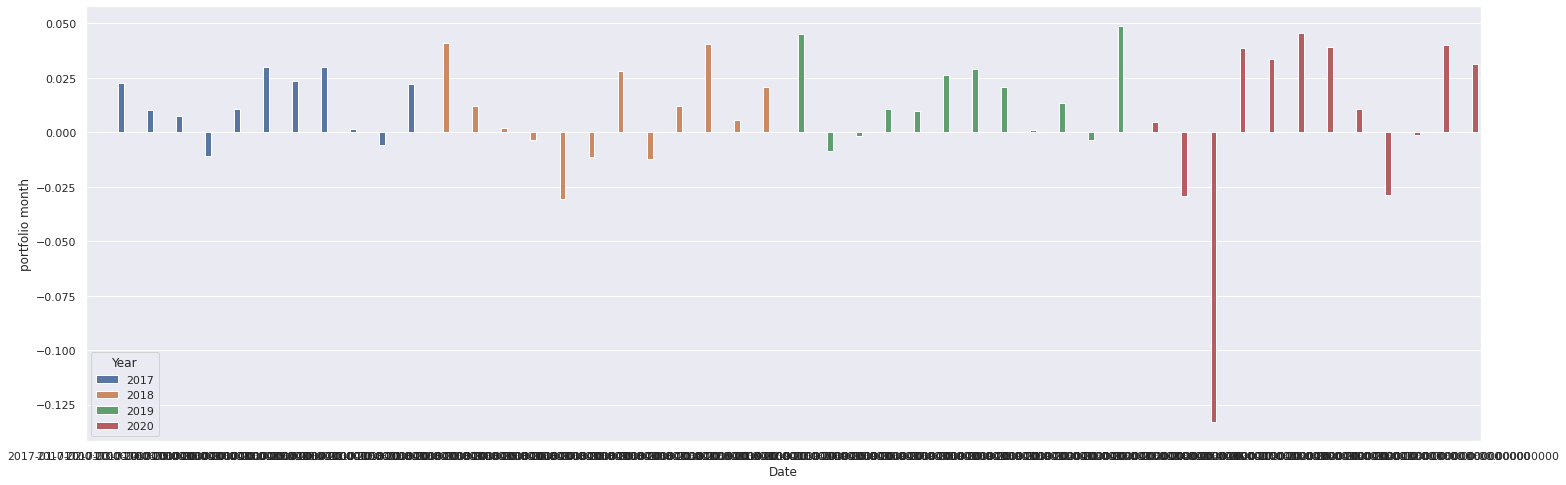

In [117]:
sns.barplot(data = portfolio, x = 'Date', y = 'portfolio month', hue = 'Year');

###B) Retorno Acumulado e Comparação com IBOV e DI / Cumulative Return and Comparison with IBOV and DI

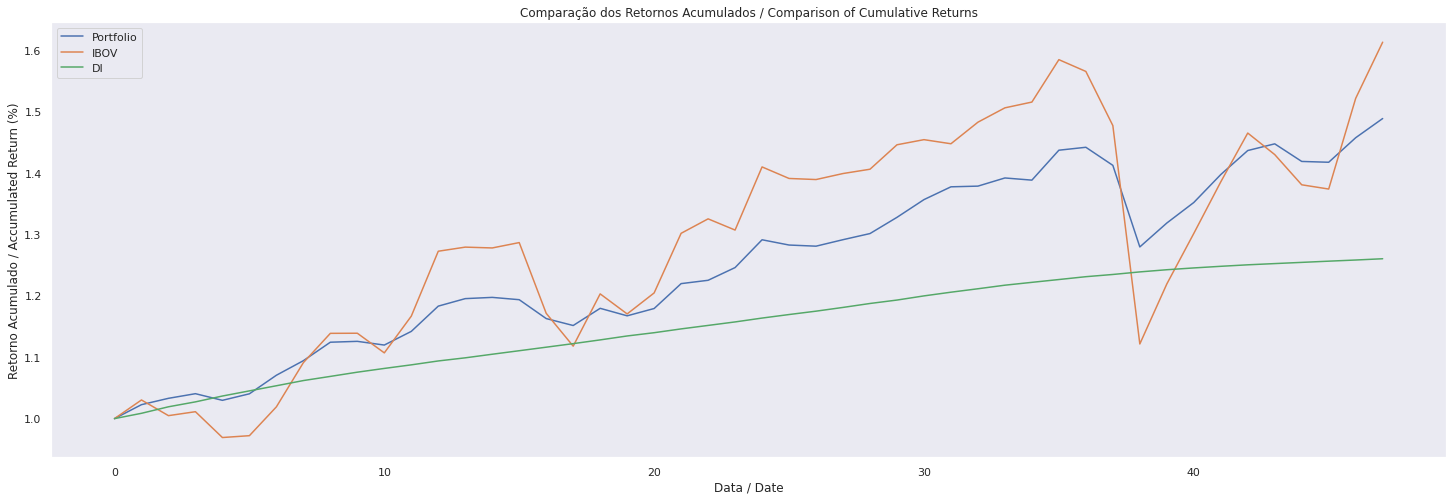

In [118]:
portfolio['portifolio accumulated'].plot(label = 'Portfolio')
portfolio['ibov accumulated'].plot(label = 'IBOV')
portfolio['di accumulated'].plot(label = "DI")
plt.title('Comparação dos Retornos Acumulados / Comparison of Cumulative Returns')
plt.xlabel('Data / Date')
plt.ylabel('Retorno Acumulado / Accumulated Return (%)')
plt.legend()
plt.grid()

###C) Retorno Mensal dos Fundos / Monthly Return of Funds

In [119]:
portfolio_fund = portfolio[['Date', 'novu', 'azql', 'oles', 'indi']]
#carteira_fundos.index = carteira_fundos['Data']
#carteira_fundos = carteira[['novu', 'azql', 'oles', 'indi']]

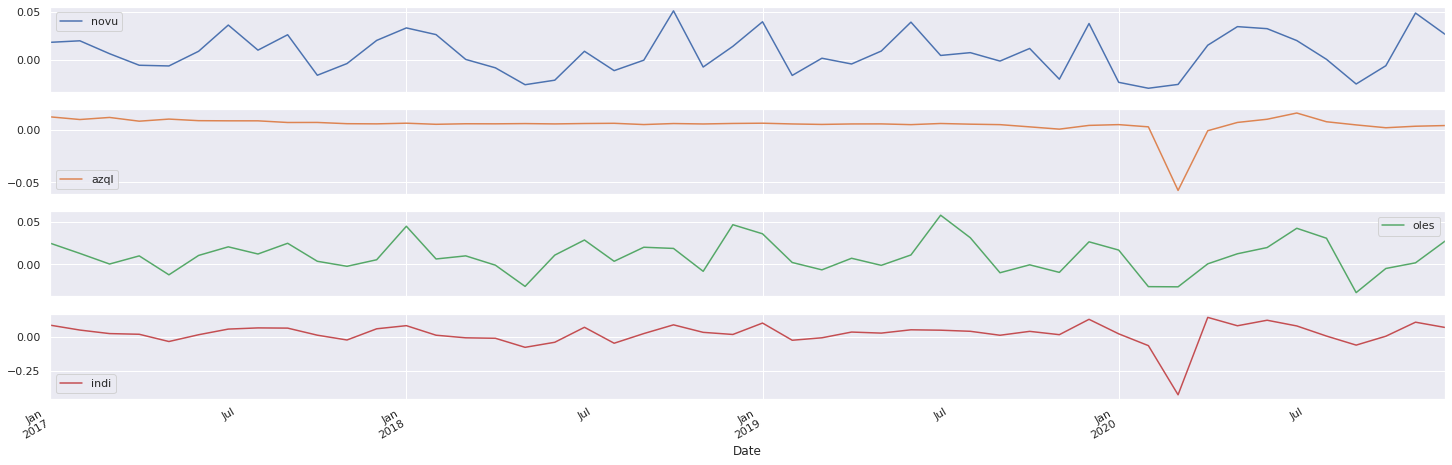

In [120]:
sns.set()
portfolio_fund.plot(subplots = True, x = 'Date');

###D) Retorno Acumulado / Accumulated Return

In [121]:
portfolio_fund['novu'][0] = 0
portfolio_fund['azql'][0] = 0
portfolio_fund['oles'][0] = 0
portfolio_fund['indi'][0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [122]:
portfolio_fund['novu_ac'] = portfolio_fund['novu'].cumsum()
portfolio_fund['azql_ac'] = portfolio_fund['azql'].cumsum()
portfolio_fund['oles_ac'] = portfolio_fund['oles'].cumsum()
portfolio_fund['indi_ac'] = portfolio_fund['indi'].cumsum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [123]:
portfolio_fund_accumulated = portfolio_fund[['Date', 'novu_ac', 'azql_ac', 'oles_ac', 'indi_ac']]

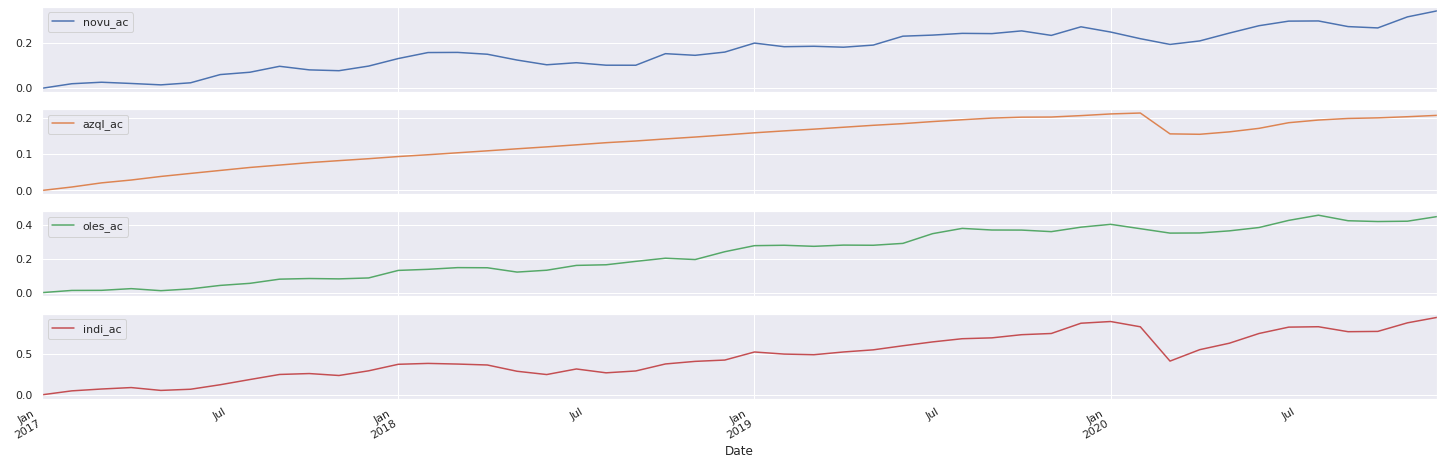

In [124]:
sns.set()
portfolio_fund_accumulated.plot(subplots = True, x = 'Date');

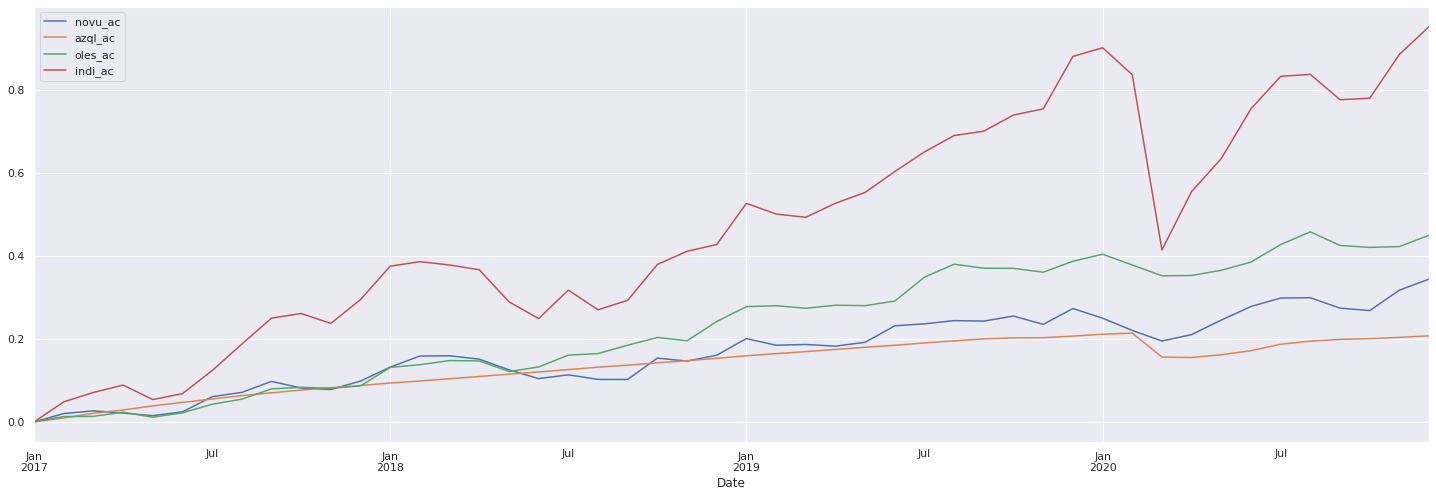

In [125]:
sns.set()
portfolio_fund_accumulated.plot(subplots = False, x = 'Date');